Sort categorical data before plotting.

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("C:\\Users\\sudai\\Downloads\\Sample - Superstore.csv\\Sample - Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
cat_order = df.groupby("Category")["Sales"].sum().sort_values(ascending=False).index
region_order = df.groupby("Region")["Profit"].median().sort_values(ascending=False).index

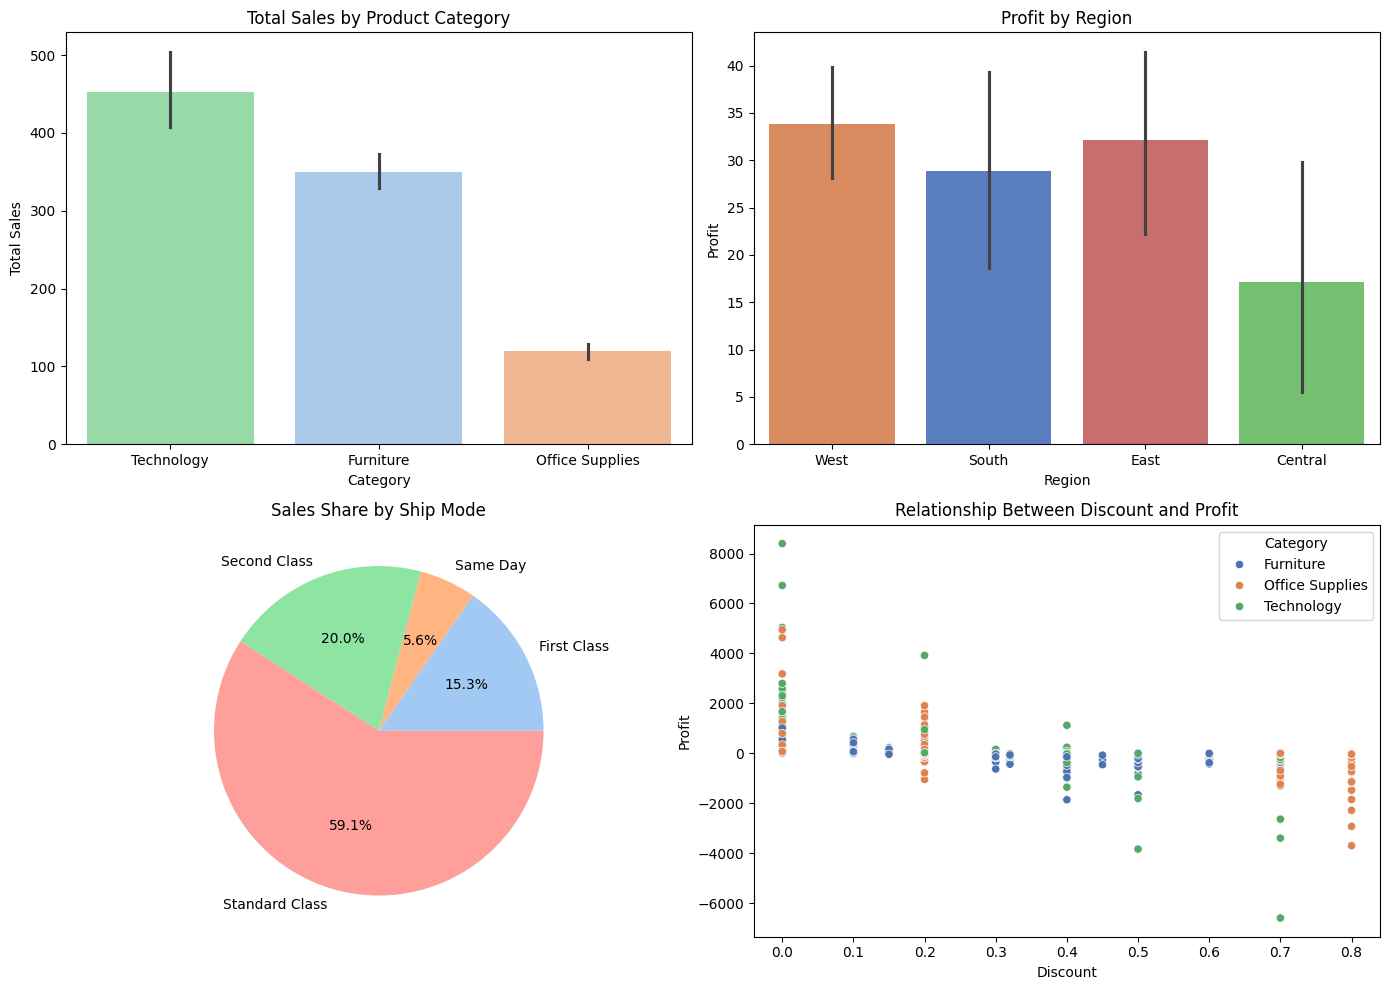

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️⃣ Bar plot - Total Sales by Category
sns.barplot(
    x='Category', y='Sales', hue='Category', data=df,
    order=cat_order, ax=axes[0,0], palette="pastel", legend=False
)
axes[0,0].set_title("Total Sales by Product Category")
axes[0,0].set_xlabel("Category")
axes[0,0].set_ylabel("Total Sales")

# 2️⃣ Bar plot - Profit by Region
sns.barplot(
    x="Region", y="Profit", hue="Region", data=df,
    order=region_order, ax=axes[0,1], palette="muted", legend=False
)
axes[0,1].set_title("Profit by Region")
axes[0,1].set_xlabel("Region")
axes[0,1].set_ylabel("Profit")

# 3️⃣ Pie plot - Sales Share by Ship Mode
ship_sales = df.groupby("Ship Mode")["Sales"].sum()
axes[1,0].pie(ship_sales, labels=ship_sales.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1,0].set_title("Sales Share by Ship Mode")

# 4️⃣ Scatter plot - Discount vs Profit
sns.scatterplot(x="Discount", y="Profit", data=df, ax=axes[1,1], hue="Category", palette="deep")
axes[1,1].set_title("Relationship Between Discount and Profit")
axes[1,1].set_xlabel("Discount")
axes[1,1].set_ylabel("Profit")

# Adjust layout
plt.tight_layout()
plt.show()